In [10]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
! ls /data

 city_facilities.csv   group_1_data.csv         incident_nearest_distances.csv
 fire_incidents.csv    incident_distances.csv  'SF Find Neighborhoods.geojson'


## Load SF neighborhood file

In [4]:
sf_boundaries = geopandas.read_file("/data/SF Find Neighborhoods.geojson")

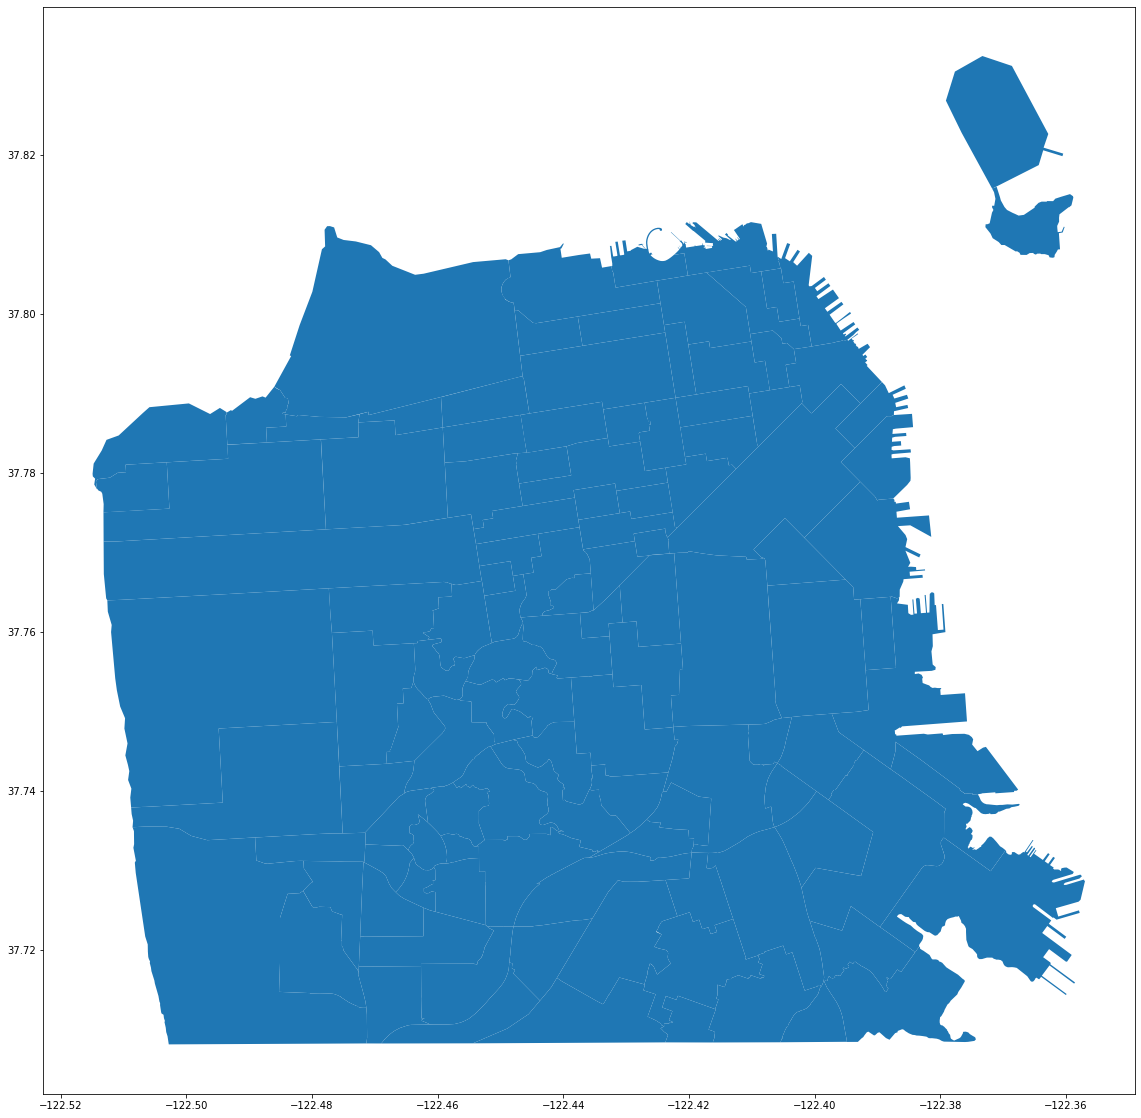

In [9]:
plt.rcParams["figure.figsize"]=20,20
_ = sf_boundaries.geometry.plot()

## Load Firestations

In [78]:
city_facilities = pd.read_csv("/data/city_facilities.csv")
city_facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   facility_id               80 non-null     int64  
 1   common_name               80 non-null     object 
 2   address                   80 non-null     object 
 3   city                      80 non-null     object 
 4   zip_code                  80 non-null     int64  
 5   block_lot                 79 non-null     object 
 6   owned_leased              80 non-null     object 
 7   dept_id_for_jurisdiction  80 non-null     int64  
 8   jurisdiction              80 non-null     object 
 9   gross_sq_ft               64 non-null     float64
 10  longitude                 80 non-null     float64
 11  latitude                  80 non-null     float64
 12  supervisor_district       80 non-null     int64  
 13  city_tenants              0 non-null      float64
 14  land_id     

In [87]:
fire_facilities = city_facilities[city_facilities['jurisdiction'] == 'Fire Department']
fire_facilities = fire_facilities[fire_facilities.common_name.str.lower().str.match("^fire station.*")]
fire_facility_pts = geopandas.points_from_xy(fire_facilities.longitude, fire_facilities.latitude, crs="EPSG:4326")
fire_facilities = geopandas.GeoDataFrame(fire_facilities)
fire_facilities['facility_location'] = fire_facility_pts
fire_facilities.head()

,facility_id,common_name,address,city,zip_code,block_lot,owned_leased,dept_id_for_jurisdiction,jurisdiction,gross_sq_ft,longitude,latitude,supervisor_district,city_tenants,land_id,facility_location
0,697,Fire Station #15,1000 Ocean Ave,San Francisco,94112,3180001,Own,38,Fire Department,12138.0,-122.452927,37.723489,7,NaN,588.0,POINT (-122.45293 37.72349)
4,707,Fire Station #24,100 Hoffman Ave,San Francisco,94114,2801001,Own,38,Fire Department,7600.0,-122.441105,37.753129,8,NaN,340.0,POINT (-122.44110 37.75313)
5,723,Fire Station #40,2155 18th Ave,San Francisco,94116,2199003,Own,38,Fire Department,7350.0,-122.475269,37.747611,7,NaN,318.0,POINT (-122.47527 37.74761)
6,692,Fire Station #10,655 Presidio Ave,San Francisco,94115,1032001,Own,38,Fire Department,14300.0,-122.446723,37.785625,2,NaN,3.0,POINT (-122.44672 37.78563)
7,728,Fire Station #48,800 Avenue I,San Francisco,94130,1939026,Own,38,Fire Department,18000.0,-122.369211,37.826668,6,NaN,1041.0,POINT (-122.36921 37.82667)


## Examine Distance-Correlated Incident Response Time 

**group_1_data.csv** contains points within neighborhoods, which have a higher correlation between incident response time, and distance to the nearest fire station.  These are incidents that may lead to insights about **where having a nearer fire station** would decrease response times.

In [40]:
distance_corr_group = geopandas.GeoDataFrame(pd.read_csv("/data/group_1_data.csv"))
distance_corr_group.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37286 entries, 0 to 37285
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   incident_id                 37286 non-null  int64  
 1   ID                          37286 non-null  int64  
 2   time_to_first_arrive        37286 non-null  float64
 3   time_to_last_leave          37285 non-null  float64
 4   supervisor_district         22173 non-null  float64
 5   neighborhood_district       37286 non-null  object 
 6   primary_situation           37286 non-null  object 
 7   est_property_loss           1054 non-null   float64
 8   civilian_injuries           37286 non-null  int64  
 9   civilian_deaths             37286 non-null  int64  
 10  time_to_first_arrive_ntile  37286 non-null  object 
 11  nearest_station             37286 non-null  float64
 12  lat                         37286 non-null  float64
 13  lon                    

In [64]:
distance_corr_group.describe()

,incident_id,ID,time_to_first_arrive,time_to_last_leave,supervisor_district,est_property_loss,civilian_injuries,civilian_deaths,nearest_station,lat,lon,i_tt_first,i_tt_first_IQR
count,3.728600e+04,3.728600e+04,37286.000000,37285.000000,22173.000000,1.054000e+03,37286.000000,37286.00000,3.728600e+04,37286.000000,37286.000000,37286.000000,3.728600e+04
mean,1.832985e+07,1.832985e+08,4.872600,26.060975,5.218960,6.329778e+04,0.000697,0.00008,7.324637e-03,37.766643,-122.447705,4.872600,2.350000e+00
std,1.591164e+06,1.591164e+07,3.263454,36.549212,2.930905,5.335737e+05,0.037339,0.00897,4.449893e-03,0.028240,0.035964,3.263454,6.990058e-13
min,1.600058e+07,1.600058e+08,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.00000,2.109502e-07,37.694987,-122.516838,0.000000,2.350000e+00
25%,1.705664e+07,1.705664e+08,3.316667,10.133333,2.000000,1.000000e+02,0.000000,0.00000,4.010482e-03,37.751394,-122.477309,3.316667,2.350000e+00
50%,1.811522e+07,1.811522e+08,4.300000,15.700000,6.000000,1.000000e+03,0.000000,0.00000,6.709037e-03,37.768763,-122.449730,4.300000,2.350000e+00
75%,2.000909e+07,2.000909e+08,5.666667,27.216667,8.000000,1.000000e+04,0.000000,0.00000,9.484234e-03,37.785155,-122.419537,5.666667,2.350000e+00
max,2.110490e+07,2.110490e+08,112.300000,3951.016667,11.000000,1.200000e+07,4.000000,1.00000,4.959197e-02,37.832039,-122.319786,112.300000,2.350000e+00


In [49]:
incident_points = geopandas.points_from_xy(distance_corr_group.lon, distance_corr_group.lat, crs="EPSG:4326")
distance_corr_group['incident_points'] = geopandas.GeoSeries(incident_points)

In [76]:
outlier_points = geopandas.GeoDataFrame(distance_corr_group[distance_corr_group['i_tt_first'] > 10.0])
outlier_points.describe()

,incident_id,ID,time_to_first_arrive,time_to_last_leave,supervisor_district,est_property_loss,civilian_injuries,civilian_deaths,nearest_station,lat,lon,i_tt_first,i_tt_first_IQR
count,1.562000e+03,1.562000e+03,1562.000000,1562.000000,926.000000,28.000000,1562.0,1562.0,1.562000e+03,1562.000000,1562.000000,1562.000000,1.562000e+03
mean,1.783998e+07,1.783998e+08,15.306487,40.505186,5.514039,5388.107143,0.0,0.0,1.012718e-02,37.768183,-122.441458,15.306487,2.350000e+00
std,1.614990e+06,1.614990e+07,8.084903,36.462653,2.736602,7764.459378,0.0,0.0,6.652749e-03,0.032104,0.046944,8.084903,6.085971e-14
min,1.600058e+07,1.600058e+08,10.016667,10.066667,1.000000,1.000000,0.0,0.0,5.144803e-07,37.703493,-122.516838,10.016667,2.350000e+00
25%,1.610910e+07,1.610910e+08,11.016667,17.033333,3.000000,100.000000,0.0,0.0,5.409261e-03,37.744730,-122.481139,11.016667,2.350000e+00
50%,1.714508e+07,1.714508e+08,12.633333,25.675000,6.000000,2000.000000,0.0,0.0,8.577053e-03,37.768331,-122.450562,12.633333,2.350000e+00
75%,1.908596e+07,1.908596e+08,16.408333,51.441667,7.000000,5750.000000,0.0,0.0,1.337877e-02,37.800761,-122.407413,16.408333,2.350000e+00
max,2.110376e+07,2.110376e+08,112.300000,416.166667,11.000000,25000.000000,0.0,0.0,4.959197e-02,37.832039,-122.319786,112.300000,2.350000e+00


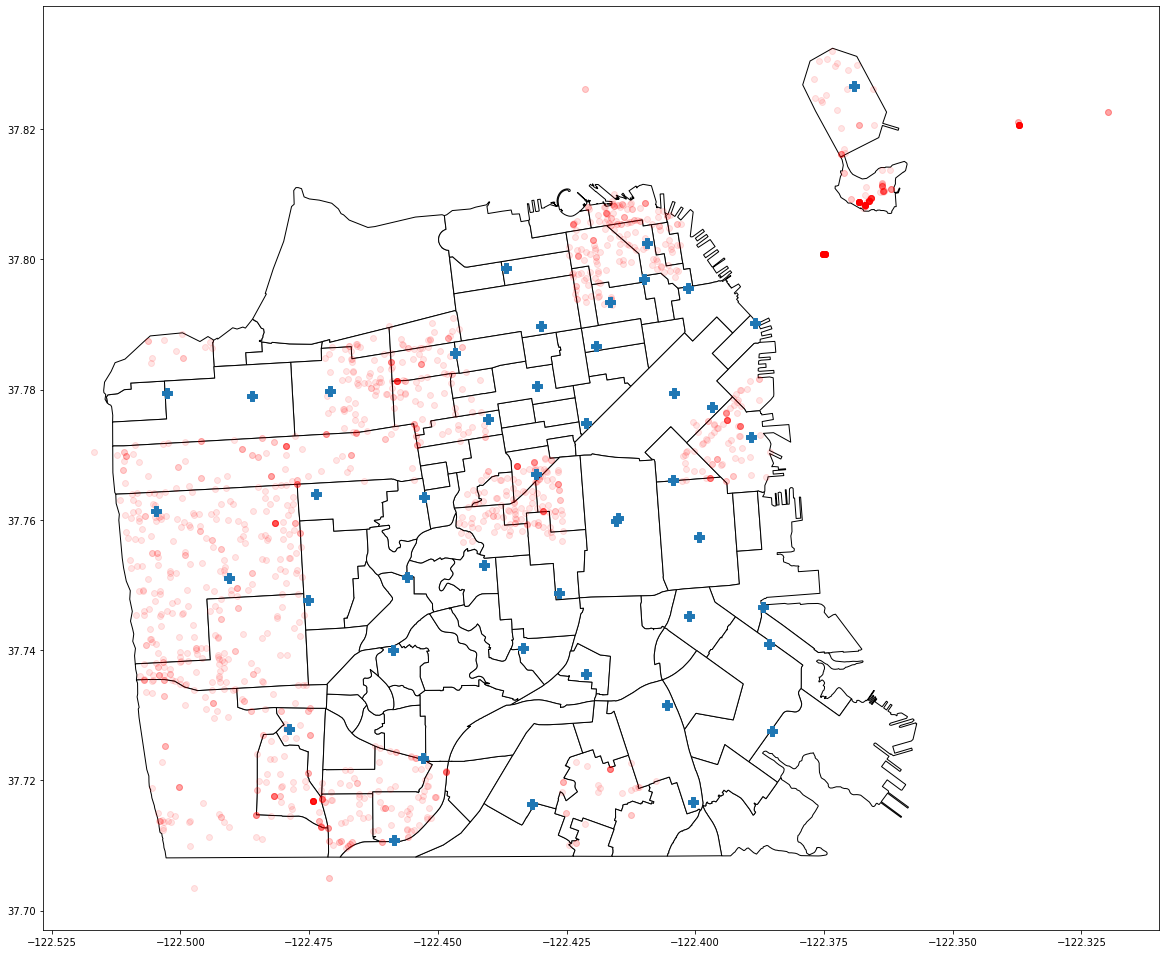

In [98]:
base_map = sf_boundaries.geometry.plot(color='white', edgecolor='black')
_ = outlier_points.incident_point.plot(ax=base_map, color='red', alpha=0.1)
_ = fire_facilities.facility_location.plot(ax=base_map, marker="P", markersize=100)